c:\users\shikha gupta\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  


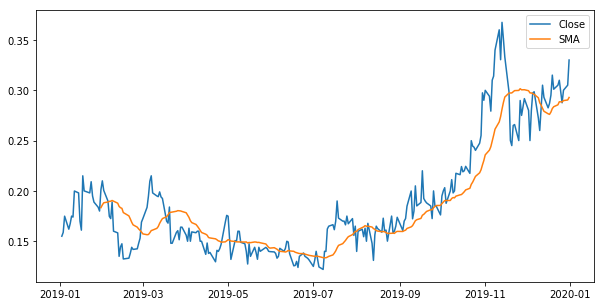

accuracy of SMA  90.58280568185519


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
dataset=pd.read_csv("RELI.csv",parse_dates=True,index_col=0)
dataset
#Simple Moving Average-------------------
m=pd.rolling_mean(dataset["Close"],20)
dataset['SMA']=np.round(m,decimals=4)
plt.figure(figsize=(10,5))
plt.plot(dataset['Close'],label="Close")
plt.plot(dataset['SMA'],label="SMA")
plt.legend()
plt.show()
error_SMA=np.mean(np.abs((dataset['Close']-dataset['SMA'])/dataset['Close']))*100
accuracy_SMA=100-error_SMA

print("accuracy of SMA ",accuracy_SMA)




accuracy of EMA 92.43441809768467


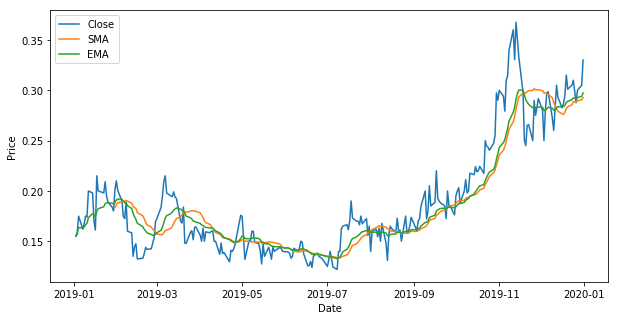

In [17]:
#Exponential Moving Average-------------------------

ema=dataset["Close"].ewm(span=20).mean()
dataset['EMA']=np.round(ema,decimals=4)
error_EMA=np.mean(np.abs((dataset['Close']-dataset['EMA'])/dataset['Close']))*100
accuracy_EMA=100-error_EMA

print("accuracy of EMA",accuracy_EMA)

plt.figure(figsize=(10,5))
plt.plot(dataset['Close'],label="Close")
plt.plot(dataset['SMA'],label="SMA")
plt.plot(dataset['EMA'],label="EMA")
plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.show()



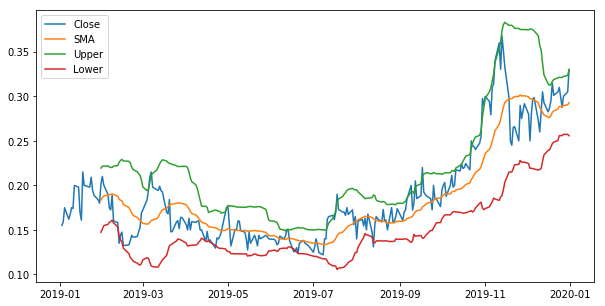

In [9]:
#bollinger band----------------------------------

dataset['SD']=dataset['Close'].rolling(window=20).std()
dataset['Upper']=dataset['SMA']+2*dataset['SD']
dataset['Lower']=dataset['SMA']-2*dataset['SD']
plt.figure(figsize=(10,5))
plt.plot(dataset['Close'],label="Close")
plt.plot(dataset['SMA'],label="SMA")
plt.plot(dataset['Upper'],label="Upper")
plt.plot(dataset['Lower'],label="Lower")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



Accuracy of new indicator:  93.02988162437589


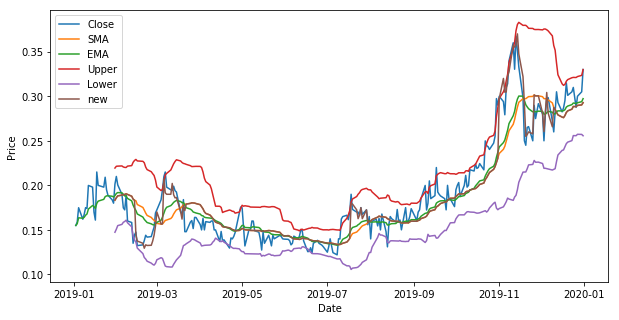

In [13]:
#new band-------------
dataset['diff']=(dataset['Upper']-dataset['Lower'])/dataset['SMA']
dataset['avg']=(dataset['High']+dataset['Low'])/2


'''if dataset['EMA' ].fillna(0)>= dataset['difference'].fillna(0):
    dataset['final']=dataset['EMA']

else:
     dataset['final']=dataset['difference']
'''

dataset['new'] = np.where((dataset['diff'] > 0.5 )
                     , dataset['avg'],dataset['SMA'])

error_new=np.mean(np.abs((dataset['Close']-dataset['new'])/dataset['Close']))*100
accuracy_new=100-error_new
print("Accuracy of new indicator: ",accuracy_new)
plt.figure(figsize=(10,5))
plt.plot(dataset['Close'],label="Close")
plt.plot(dataset['SMA'],label="SMA")
plt.plot(dataset['EMA'],label="EMA")
plt.plot(dataset['Upper'],label="Upper")
plt.plot(dataset['Lower'],label="Lower")
plt.plot(dataset['new'],label="new")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
